In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
%matplotlib inline

In [3]:
def cal_y_pred(w, x):
    return (1/(1 + np.exp(-1 * np.dot(w.T, x))))


In [4]:
def loss_function(dataset,w):
    loss = 0
    for index, row in dataset.iterrows():
        x = np.array([1])
        x = np.concatenate((x, row[0:len(w)-1]))
        x = np.array(x)        
        y = row[len(row)-1]
        y_pred = cal_y_pred(w,x)
        if y == 1:
            loss -= np.log(y_pred)
        else:
            loss -= np.log(1-y_pred)
#         loss -= np.log(y_pred) * y + (1-y)*np.log(1-y_pred)
    return loss

In [5]:
def accuracy_function(dataset, w):
    count = 0
    for i, row in dataset.iterrows():
        row = row.to_numpy()
        x = np.array([1])
        x = np.concatenate((x, row[0:len(w)-1]))
        x = np.array(x)
        y_pred = cal_y_pred(w, x)
        if (y_pred >= 0.5 and row[len(w)-1] == 1) or (y_pred < 0.5 and row[len(w)-1] == 0):
            count += 1
    return count / dataset.shape[0]


In [6]:
def gradiet_function(dataset,w):
    min_grad = np.zeros((len(w), 1))
    for _, row in dataset.iterrows():
        row = row.to_numpy()
        x = np.array([1])
        y = row[len(row)-1]
        x = np.concatenate((x, row[0:len(w)-1]))
        y_pred = cal_y_pred(w,x)
        min_grad += (y_pred - y.astype(float)) * x.reshape((5,1))
    return min_grad

def Stocastic_gradient_function(dataset, w):
    row = dataset.sample(n = 1)
    row = row.to_numpy()
    row = row[0]
    x = np.array([1])
    y = row[len(row)-1]
    x = np.concatenate((x, row[0:len(w)-1]))
    y_pred = cal_y_pred(w,x)
    return (y_pred - y.astype(float)) * x.reshape((5,1))

In [7]:
def confusion_matrix_function(train, test, w):
    train = train.to_numpy()
    test = test.to_numpy()
    train_x = train[:, 0:train.shape[1]-1]
    train_y = train[:, train.shape[1]-1]
    test_x = test[:, 0:train.shape[1]-1]
    test_y = test[:, train.shape[1]-1]
    train_pred_y = list()
    test_pred_y = list()
    for i in range(len(train_x)):
        x = np.array([1])
        x = np.concatenate((x, train_x[i]))
        y_pred = cal_y_pred(w,x)
        if(y_pred >= 0.5):
            train_pred_y.append(1)
        else:
            train_pred_y.append(0)
    for i in range(len(test_x)):
        x = np.array([1])
        x = np.concatenate((x, test_x[i]))
        y_pred = cal_y_pred(w,x)
        if(y_pred >= 0.5):
            test_pred_y.append(1)
        else:
            test_pred_y.append(0)
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(train_x)):
        if train_y[i] == 0:
            if train_pred_y[i] == 0:
                TN = TN + 1
            else:
                FP = FP + 1
        else:
            if train_pred_y[i] == 0:
                FN = FN + 1
            else:
                TP = TP + 1
    confusion_matrix_train['accuracy'].append((TP+TN)/(TP+TN+FN+FP))
    recall = (TP)/(TP+FN)
    precision = (TP)/(TP+FP)
    fscore = 2*(recall * precision) / (recall + precision)
    confusion_matrix_train['recall'].append(recall)
    confusion_matrix_train['precision'].append(precision)
    confusion_matrix_train['fscore'].append(fscore)
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(test_x)):
        if test_y[i] == 0:
            if test_pred_y[i] == 0:
                TN = TN + 1
            else:
                FP = FP + 1
        else:
            if test_pred_y[i] == 0:
                FN = FN + 1
            else:
                TP = TP + 1
    confusion_matrix_test['accuracy'].append((TP+TN)/(TP+TN+FN+FP))
    recall = (TP)/(TP+FN)
    precision = (TP)/(TP+FP)
    fscore = 2*(recall * precision) / (recall + precision)
    confusion_matrix_test['recall'].append(recall)
    confusion_matrix_test['precision'].append(precision)
    confusion_matrix_test['fscore'].append(fscore)

In [8]:
def logistic_model(data, index,choice, epoch = 500, learning_rate = 0.01):
    w = np.ones((data.shape[1], 1))
    test = data.sample(frac = 0.3, random_state = 2)
    train = data.drop(test.index)
    loss = list()
    accuracy = list()
    for i in range(epoch):
        if i % 25 == 0:
            loss.append(loss_function(train, w))
            accuracy.append(accuracy_function(train, w))
        w = w - learning_rate * choice(train, w)
    if index != 0:
        plt.subplot(2, 1, 1)
        plt.plot(loss)
        plt.xlabel('Epochs')
        plt.ylabel('log loss function')
        plt.subplot(2, 1, 2)
        plt.plot(accuracy)
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy') 
        if choice == gradiet_function:
            name = 'gd'
        else:
            name = 'sgd'
        plt.savefig(name+'_'+str(index)+'th_iteration_loss_vs_accuracy.png')
        plt.show()
        plt.clf()
    confusion_matrix_function(train, test, w)
    confusion_matrix_train['loss'].append(loss_function(train, w))
    confusion_matrix_test['loss'].append(loss_function(test, w))

    print(str(index) + 'th iteration')
    print(w)
    return accuracy


In [9]:
def plot_learning_rates(data, name,diff_rates ):
    p = 1
    for i in range(len(data)):
        plt.plot(data[i], label = str(diff_rates[i]))
        p = p + 1
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuarcy')
    plt.savefig(name)
    plt.clf()

Gradient_function:

Coefficient Values


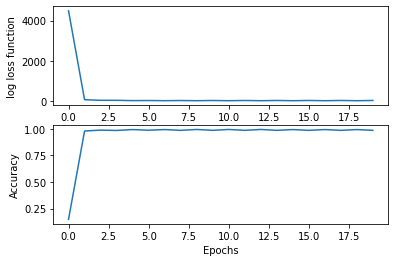

1th iteration
[[ 12.49703683]
 [-15.23102513]
 [ -7.60119343]
 [ -9.96931819]
 [ -1.21222686]]


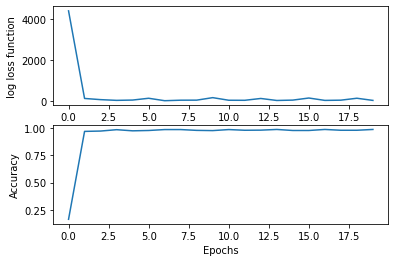

2th iteration
[[ 15.01313954]
 [-16.82855676]
 [ -8.59755844]
 [-11.54141926]
 [ -2.16858728]]


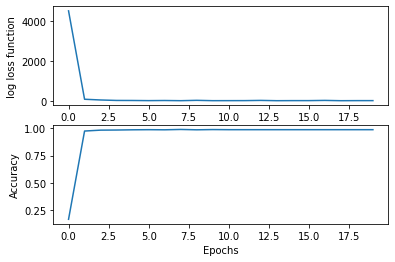

3th iteration
[[ 13.07318557]
 [-14.28241795]
 [ -7.55263851]
 [ -8.95997631]
 [ -0.9515077 ]]


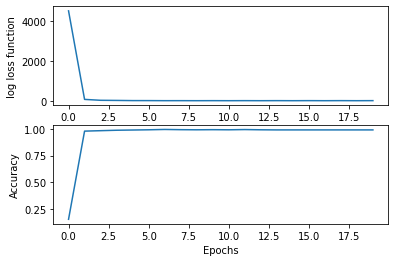

4th iteration
[[ 13.00267524]
 [-15.32349555]
 [ -7.62189397]
 [ -9.93572711]
 [ -1.03358812]]


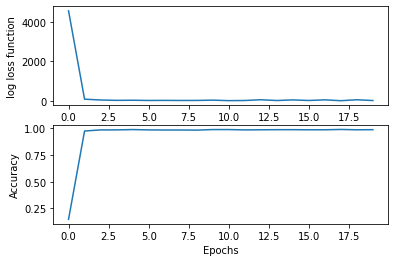

5th iteration
[[ 13.21515113]
 [-13.65272648]
 [ -7.2923206 ]
 [ -9.56659183]
 [ -1.38349277]]


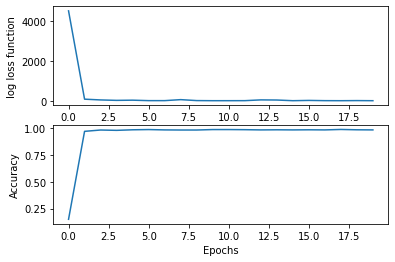

6th iteration
[[ 13.18866061]
 [-14.1420418 ]
 [ -7.78368019]
 [ -9.23866068]
 [ -1.35451899]]


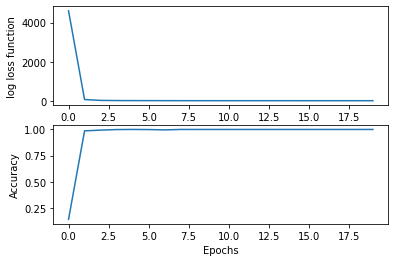

7th iteration
[[ 12.43406408]
 [-16.79572659]
 [ -8.35088184]
 [-10.46330833]
 [ -1.26502915]]


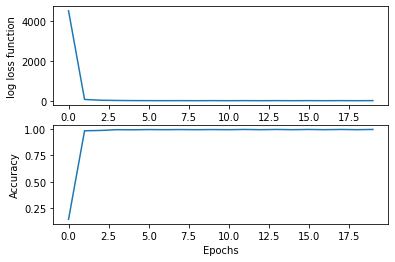

8th iteration
[[ 13.02903183]
 [-15.42107529]
 [ -7.82647247]
 [-10.17644425]
 [ -1.25073936]]


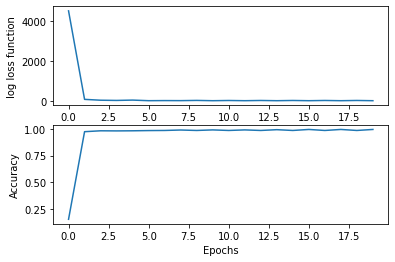

9th iteration
[[ 14.00391209]
 [-14.45982785]
 [ -7.13151117]
 [ -8.7175411 ]
 [ -0.3791154 ]]


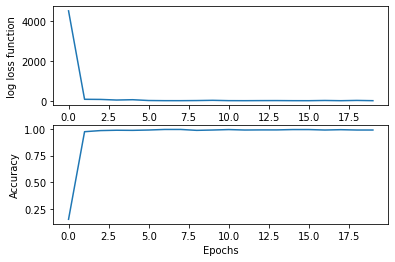

10th iteration
[[ 13.07094227]
 [-13.94385628]
 [ -7.47959228]
 [ -9.78644271]
 [ -1.43910464]]
 ####   Training data ####  
accuracy 0.9887500000000001
recall 0.9863659041746848
precision 0.9886402598563974
fscore 0.9874874946397068
loss [31.58988761]
 ####   Test data ####  
accuracy 0.9893203883495145
recall 0.985684545711039
precision 0.9899320258439623
fscore 0.987742288152865
loss [15.62878844]
Stocastic_gradient_function:

Coefficient Values


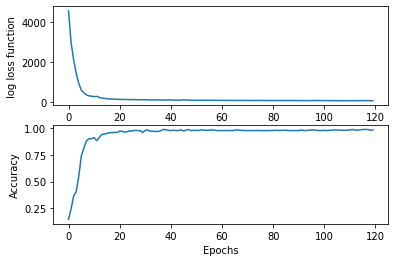

1th iteration
[[ 1.47446054]
 [-1.6580458 ]
 [-0.85725531]
 [-1.07506777]
 [-0.14766163]]


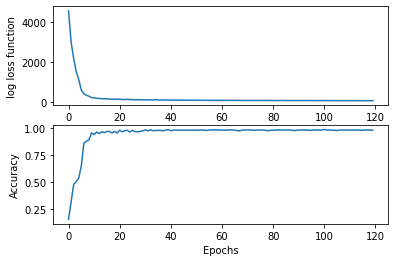

2th iteration
[[ 1.4975452 ]
 [-1.63179081]
 [-0.94267982]
 [-1.04944985]
 [-0.15848588]]


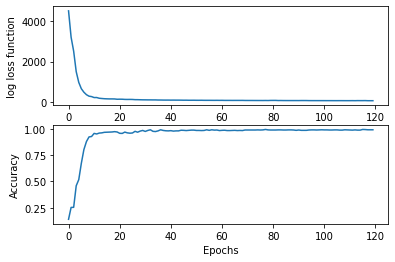

3th iteration
[[ 1.42135653]
 [-1.65173532]
 [-0.87192653]
 [-1.01124885]
 [-0.09876761]]


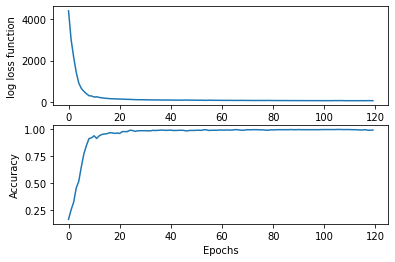

4th iteration
[[ 1.5488178 ]
 [-1.6109724 ]
 [-0.93713586]
 [-0.99074319]
 [-0.1557846 ]]


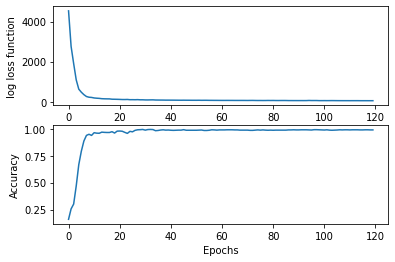

5th iteration
[[ 1.46448975]
 [-1.65422129]
 [-0.93741432]
 [-1.01324401]
 [-0.19166232]]


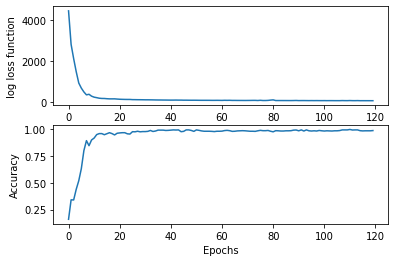

6th iteration
[[ 1.40691928]
 [-1.69820276]
 [-0.91369476]
 [-1.04215131]
 [-0.12397258]]


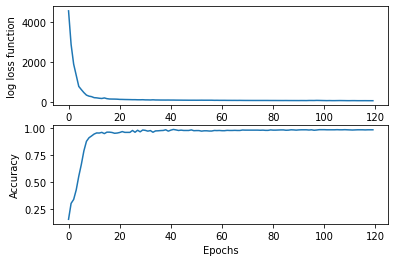

7th iteration
[[ 1.53089967]
 [-1.53396392]
 [-0.94466472]
 [-1.05937974]
 [-0.17632163]]


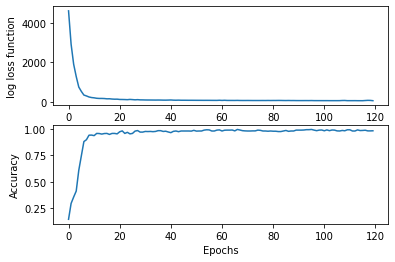

8th iteration
[[ 1.39612601]
 [-1.63738852]
 [-0.94571238]
 [-1.02156499]
 [-0.13159447]]


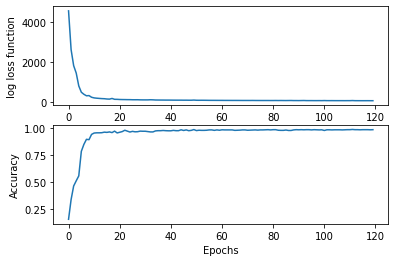

9th iteration
[[ 1.48371087]
 [-1.62249101]
 [-0.86199756]
 [-1.026981  ]
 [-0.15006446]]


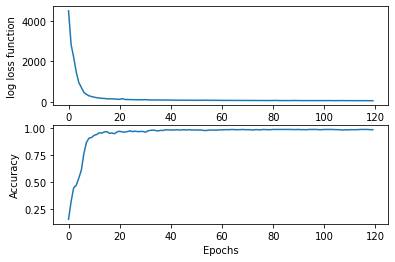

10th iteration
[[ 1.55197807]
 [-1.63432587]
 [-0.90880935]
 [-0.99851842]
 [-0.12456857]]
 ####   Training data ####  
accuracy 0.9873958333333335
recall 0.9866531473128812
precision 0.9850024318364797
fscore 0.9858175868843235
loss [53.04872626]
 ####   Test data ####  
accuracy 0.9859223300970873
recall 0.9851920022875686
precision 0.9826748508956051
fscore 0.9838687254228426
loss [22.97071474]


<Figure size 432x288 with 0 Axes>

In [10]:
dataset = pd.read_csv('dataset_LR.csv')
dataset = dataset.sample(frac = 1, random_state = 11)
confusion_matrix_train = dict()
confusion_matrix_train['accuracy'] = []
confusion_matrix_train['recall'] = []
confusion_matrix_train['precision'] = []
confusion_matrix_train['fscore'] = []
confusion_matrix_train['loss'] = []

confusion_matrix_test = dict()
confusion_matrix_test['accuracy'] = []
confusion_matrix_test['recall'] = []
confusion_matrix_test['precision'] = []
confusion_matrix_test['fscore'] = []
confusion_matrix_test['loss'] = []

print("Gradient_function:\n")
print("Coefficient Values")
for i in range(10):
#     print(i)
    dataset = dataset.sample(frac = 1, random_state = i)
    logistic_model(dataset, i+1, gradiet_function)
print(" ####   Training data ####  ")
for i in confusion_matrix_train:
    print(i, sum(confusion_matrix_train[i])/len(confusion_matrix_train[i]))
print(" ####   Test data ####  ")
for i in confusion_matrix_test:
    print(i, sum(confusion_matrix_test[i])/len(confusion_matrix_test[i]))


confusion_matrix_train = dict()
confusion_matrix_train['accuracy'] = []
confusion_matrix_train['recall'] = []
confusion_matrix_train['precision'] = []
confusion_matrix_train['fscore'] = []
confusion_matrix_train['loss'] = []

confusion_matrix_test = dict()
confusion_matrix_test['accuracy'] = []
confusion_matrix_test['recall'] = []
confusion_matrix_test['precision'] = []
confusion_matrix_test['fscore'] = []
confusion_matrix_test['loss'] = []

print("Stocastic_gradient_function:\n")

print("Coefficient Values")

for i in range(10):
#     print(i)
    dataset = dataset.sample(frac = 1, random_state = i)
    logistic_model(dataset, i+1, Stocastic_gradient_function,epoch = 3000)
print(" ####   Training data ####  ")
for i in confusion_matrix_train:
    print(i, sum(confusion_matrix_train[i])/len(confusion_matrix_train[i]))
print(" ####   Test data ####  ")
for i in confusion_matrix_test:
    print(i, sum(confusion_matrix_test[i])/len(confusion_matrix_test[i]))
    

# Gradient_function:

Coefficient Values

1th iteration
[[ 12.49703683]
 [-15.23102513]
 [ -7.60119343]
 [ -9.96931819]
 [ -1.21222686]]

2th iteration
[[ 15.01313954]
 [-16.82855676]
 [ -8.59755844]
 [-11.54141926]
 [ -2.16858728]]

3th iteration
[[ 13.07318557]
 [-14.28241795]
 [ -7.55263851]
 [ -8.95997631]
 [ -0.9515077 ]]

4th iteration
[[ 13.00267524]
 [-15.32349555]
 [ -7.62189397]
 [ -9.93572711]
 [ -1.03358812]]

5th iteration
[[ 13.21515113]
 [-13.65272648]
 [ -7.2923206 ]
 [ -9.56659183]
 [ -1.38349277]]

6th iteration
[[ 13.18866061]
 [-14.1420418 ]
 [ -7.78368019]
 [ -9.23866068]
 [ -1.35451899]]

7th iteration
[[ 12.43406408]
 [-16.79572659]
 [ -8.35088184]
 [-10.46330833]
 [ -1.26502915]]

8th iteration
[[ 13.02903183]
 [-15.42107529]
 [ -7.82647247]
 [-10.17644425]
 [ -1.25073936]]

9th iteration
[[ 14.00391209]
 [-14.45982785]
 [ -7.13151117]
 [ -8.7175411 ]
 [ -0.3791154 ]]

10th iteration
[[ 13.07094227]
 [-13.94385628]
 [ -7.47959228]
 [ -9.78644271]
 [ -1.43910464]]
 ####   Training data ####  
accuracy 0.9887500000000001
recall 0.9863659041746848
precision 0.9886402598563974
fscore 0.9874874946397068
 ####   Test data ####  
accuracy 0.9893203883495145
recall 0.985684545711039
precision 0.9899320258439623
fscore 0.987742288152865


# Stocatic_gradient_function:


Coefficient Values

1th iteration
[[ 1.44958082]
 [-1.62655586]
 [-0.95894024]
 [-1.00853822]
 [-0.18833901]]

2th iteration
[[ 1.56144606]
 [-1.59768878]
 [-0.94658096]
 [-1.05982002]
 [-0.15081184]]

3th iteration
[[ 1.45923508]
 [-1.65793324]
 [-0.90867227]
 [-1.00641616]
 [-0.23006916]]

4th iteration
[[ 1.52122628]
 [-1.5938015 ]
 [-0.94220304]
 [-1.04396406]
 [-0.27351815]]

5th iteration
[[ 1.46569339]
 [-1.64678413]
 [-0.90991531]
 [-1.03210739]
 [-0.1358455 ]]

6th iteration
[[ 1.48211044]
 [-1.63987092]
 [-0.87289197]
 [-1.0096333 ]
 [-0.27843544]]

7th iteration
[[ 1.58105692]
 [-1.54220594]
 [-0.898972  ]
 [-0.95777723]
 [-0.22896254]]

8th iteration
[[ 1.45201516]
 [-1.61375061]
 [-0.91301438]
 [-1.05573959]
 [-0.17337152]]

9th iteration
[[ 1.48950223]
 [-1.64218816]
 [-0.87813654]
 [-0.95766028]
 [-0.18597979]]

10th iteration
[[ 1.56383646]
 [-1.58327141]
 [-0.89623278]
 [-1.01419088]
 [-0.1729309 ]]
 ####   Training data ####  
accuracy 0.9875
recall 0.9882888410682769
precision 0.9836405708485536
fscore 0.985949773146606
 ####   Test data ####  
accuracy 0.9861650485436894
recall 0.9868953045701149
precision 0.9816347271652873
fscore 0.98418878888897

# Stocastic_gradient_function:

 ####   Training data ####  
accuracy 0.93
recall 0.8815907785852456
precision 0.9591738029596037
fscore 0.918658058037305
 ####   Test data ####  
accuracy 0.9317961165048544
recall 0.878819905992199
precision 0.9616193531415685
fscore 0.9180748272540763

# Gradient_function:

 ####   Training data ####  
accuracy 0.9892708333333333
recall 0.9937400164852805
precision 0.982573086486148
fscore 0.9881238511126696
 ####   Test data ####  
accuracy 0.9895631067961166
recall 0.9894137804930491
precision 0.9867845302218357
fscore 0.9880501046447161

In [13]:
diff_rates = [0.01, 0.001, 0.0001]
data = dataset.sample(frac = 1, random_state = 0)

gd_accuracy = list()
sgd_accuracy = list()
for i in diff_rates:
    gd_accuracy.append(logistic_model(data, 0, gradiet_function, learning_rate = i))
    sgd_accuracy.append(logistic_model(data, 0, Stocastic_gradient_function,epoch = 3000, learning_rate = i))


0th iteration
[[ 13.35769665]
 [-14.03555516]
 [ -8.19243317]
 [ -8.72626361]
 [ -1.31436597]]
0th iteration
[[ 1.50316375]
 [-1.60750934]
 [-0.96419086]
 [-1.01745625]
 [-0.17582398]]
0th iteration
[[ 3.32841084]
 [-3.24684164]
 [-1.87865879]
 [-2.25140465]
 [-0.22486133]]
0th iteration
[[ 0.77498272]
 [-0.90886378]
 [-0.24967022]
 [-0.32576093]
 [ 0.29602306]]
0th iteration
[[ 1.70374364]
 [-1.80423181]
 [-1.02726611]
 [-1.1776677 ]
 [-0.19002861]]
0th iteration
[[0.90882452]
 [0.48581374]
 [0.42587646]
 [0.85510778]
 [0.9859234 ]]


In [14]:
plot_learning_rates(sgd_accuracy, 'sgd_different_rates.png', diff_rates)
plot_learning_rates(gd_accuracy, 'gd_different_rates.png',diff_rates)


<Figure size 432x288 with 0 Axes>